In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import torch
import torch.nn.functional as FNT


In [3]:


######################################################
#
#  outils d'affichage -  NE PAS TOUCHER

def ComputeCatPerPixel(XX,YY):
    CategoriePerPixel = XX.copy()
    Larg,Haut = XX.shape
    for i in range(Larg):
        for j in range(Haut):
            x = XX[i][j]
            y = YY[i][j]
            Scores = computeSCORES(x,y)
            CategoriePerPixel[i][j] = determineCAT(Scores)
    return CategoriePerPixel

def DessineFond():
    iS = ComputeCatPerPixel(XXXX,YYYY)
    levels = [-1, 0, 1, 2]
    c1 = ('r', 'g', 'b')
    plt.contourf(XXXX, YYYY, iS, levels, colors = c1)

def DessinePoints():
    c2 = ('darkred','darkgreen','lightblue')
    for point in points:
        coord = point[0]
        cat   = point[1]
        plt.scatter(coord[0], coord[1] ,  s=50, c=c2[cat],  marker='o')


def determineCAT(Scores):
    cat = 0
    if Scores[1] > Scores[0] and Scores[1] > Scores[2] : cat = 1
    if Scores[2] > Scores[0] and Scores[2] > Scores[1] : cat = 2
    return cat

##############################################################
#
#  PROJET

# Chaque échantillon a 2 caractéristiques : x et y
# Nous devons apprendre à deviner la catégorie : 0 1 ou 2 suivant ce couple (x,y)

# Pour chaque catégorie i, nous avons 3 paramètrss ai, bi, ci d'apprentissage
# Pour un couple (x,y), nous calculons un score pour chaque catégorie :
# ScoreCat0 = a0 * x + b0 * y + c0   (équivaut à 1 neuronne)
# ScoreCat1 = a1 * x + b1 * y + c1   (équivaut à 1 neuronne)
# ScoreCat2 = a2 * x + b2 * y + c2   (équivaut à 1 neuronne)

# Plus simplemennt :
#         Scores = W . (x,y,1)    W représente 3 neurones, chaque neurone a 3 paramètres internes

# Le plus fort score est associé à la catégorie retenue

# Pour calculer l'erreur, on prend le score Sk de la vrai catégorie k de l'échantillon.
# On calcule Err = Sigma_(j=0 à nb_cat) max(0,Sj-Sk)  avec Sj score de la cat j

# Comment interpréter cette formule :
# La grandeur Sj-Sk nous donne l'écart entre le score de la bonne catégorie et le score de la cat j.
# Si j correspond à k, la contribution à l'erreur vaut 0, on ne tient pas compte de la valeur Sj=k dans l'erreur
# Sinon Si cet écart est positif, ce n'est pas bon signe, car cela sous entend que le plus grand
#          score ne correspond pas à la bonne catégorie et donc on obtient un malus.
#          Plus le mauvais score est grand? plus le malus est important.
#       Si cet écart est négatif, cela sous entend que le score de la bonne catégorie est supérieur
#          au score de la catégorie courante. Tout va bien. Mais il ne faut pas que cela influence
#          l'erreur car l'algorithme doit corriger les mauvaises prédictions. Pour cela, max(0,.)
#          permet de ne pas tenir compte de cet écart négatif dans l'erreur.




def computeSCORES(x,y):
    Input = torch.FloatTensor([x,y,1])
    Scores  = torch.matmul(Input, W) # multiplication matricielle sinon broadcasting
    return Scores


In [4]:
######################################################

# (x,y, category)
points = [ [(0.5,0.4),0],
           [(0.8,0.3),0],
		    [(0.3,0.8),0],
		    [(-.4,0.3),1],
		    [(-.3,0.7),1],
		    [(-.7,0.2),1],
		    [(-.4,-.5),1],
		    [(0.7,-.4),2],
		    [(0.5,-.6),2]]

XXXX , YYYY = np.meshgrid(np.arange(-1, 1, 0.01), np.arange(-1, 1, 0.01))

W = torch.randn((3,3), requires_grad=True)

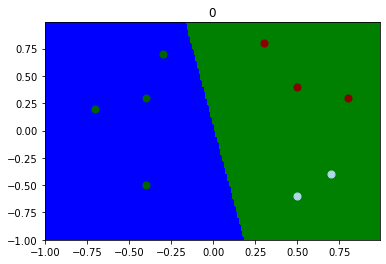

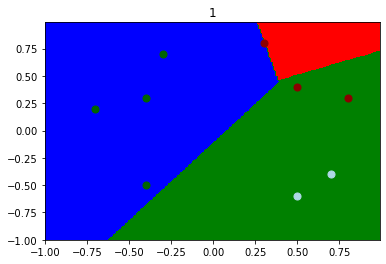

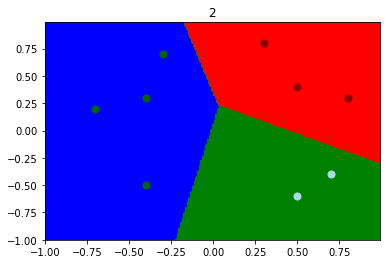

KeyboardInterrupt: 

In [5]:

for i in range(20):

    DessineFond()
    DessinePoints()

    plt.title(str(i))
    plt.pause(2)  # pause avec duree en secondes

    W = torch.randn((3,3)) # juste pour animer au début, cette ligne doit disparaitre

plt.show()